In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy import nan as NA
import pydataset

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.datasets import load_breast_cancer

In [40]:
cancer= load_breast_cancer()


In [13]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
x_train,x_test,y_train,y_test= train_test_split(cancer['data'],cancer['target'],test_size=0.3)

d=DecisionTreeClassifier()
d.fit(x_train,y_train)
pred=d.predict(x_test)
print(accuracy_score(y_test,pred))
print(recall_score(y_test,pred))
print(precision_score(y_test,pred))
print(f1_score(y_test,pred))


0.935672514619883
0.923728813559322
0.9819819819819819
0.9519650655021833


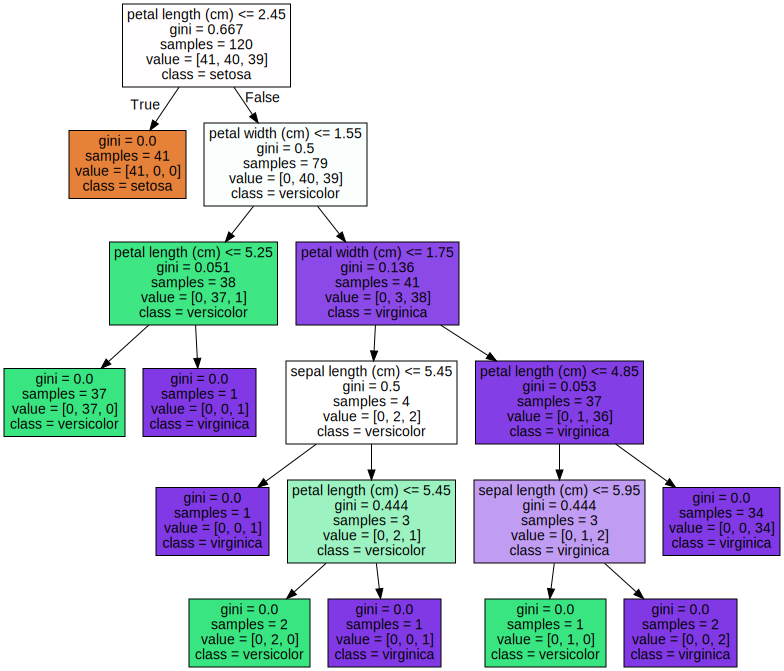

In [15]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

dt_clf= DecisionTreeClassifier(random_state=156)
iris_data= load_iris()
x_train,x_test,y_train,y_test= train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf.fit(x_train, y_train)

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity = True , filled=True)

import graphviz

with open('tree.dot') as f:
    dot_graph= f.read()
graphviz.Source(dot_graph)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
import os
os.getcwd()

'/Users/chloe/Desktop/python/강의'

## 결정트리실습 - Human Activity Recognition

In [22]:
#https://github.com/wikibook/pymldg-rev/blob/master/4장/4.2%20결정%20트리.ipynb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10]) 

#중복된 피처명을 확인
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()


#원본 데이터에 중복된 Feature 명으로 인하여 신규 버전의 Pandas에서 Duplicate name 에러를 발생.
#중복 feature명에 대해서 원본 feature 명에 '_1(또는2)'를 추가로 부여하는 함수인 get_new_feature_name_df() 생성

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']
column_index    42
dtype: int64


In [25]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

print('## 학습 피처 데이터셋 info()')
print(X_train.info())

print(y_train['action'].value_counts())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))


결정 트리 예측 정확도: 0.8548


In [29]:
# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}
Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [30]:
grid_cv.cv_results_ 

feature_importance

{'mean_fit_time': array([1.45225968, 1.84317722, 2.15550776, 2.42367458, 2.70873399,
        2.74279299, 2.73942719]),
 'std_fit_time': array([0.0122904 , 0.03749976, 0.0574481 , 0.11538157, 0.19755156,
        0.24208086, 0.24402276]),
 'mean_score_time': array([0.00553784, 0.00541701, 0.00566664, 0.00558677, 0.00578837,
        0.0054522 , 0.00540481]),
 'std_score_time': array([4.50258713e-04, 7.30826023e-05, 3.23194183e-04, 2.28442605e-04,
        5.69821290e-04, 1.65054508e-04, 1.66175704e-04]),
 'param_max_depth': masked_array(data=[6, 8, 10, 12, 16, 20, 24],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 6},
  {'max_depth': 8},
  {'max_depth': 10},
  {'max_depth': 12},
  {'max_depth': 16},
  {'max_depth': 20},
  {'max_depth': 24}],
 'split0_test_score': array([0.81373215, 0.82053025, 0.79945615, 0.79469748, 0.79945615,
        0.8028552 , 0.7960571 ]),
 'split1_test_score': array

결정 트리 예측 정확도:0.8575


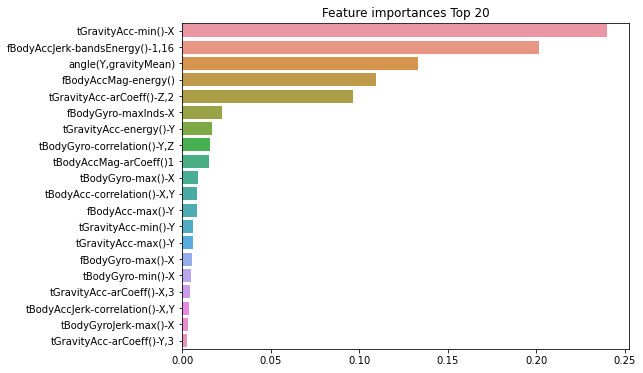

In [33]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

#Feature importance에서 전체 , 탑 5개 중에 뭐가 더 중요할지
#고객의 정보를 다ㅏㅏㅏ 모아서 이 제품을 살지말지 예측 , 
#정보가 많으면 많을수록 정확한 예측일거같지만 그렇지 않음  (쓸모가없는것들은 해로울때도 있음- 생각치도 못한 영향을 서로 끼쳐서 다중공선성 초래)  

## Ensemble

In [55]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

In [49]:
x_train,x_test,y_train,y_test=train_test_split(cancer.data,cancer.target,
                                               test_size=0.2, random_state=156)
lr_clf=LogisticRegression(solver='liblinear')
knn_clf=KNeighborsClassifier(n_neighbors= 8)
#soft voting 
vo_clf=VotingClassifier([('LR',lr_clf),('KNN', knn_clf)], voting='soft')
vo_clf.fit(x_train, y_train)
pred= vo_clf.predict(x_test)
accuracy_score(y_test,pred)



0.956140350877193

In [51]:
#lOGISTIC
lr_clf.fit(x_train, y_train)
pred= lr_clf.predict(x_test)
accuracy_score(y_test,pred)


0.9473684210526315

In [52]:
#KNN
knn_clf.fit(x_train, y_train)
pred=knn_clf.predict(x_test)
accuracy_score(y_test,pred)

0.9385964912280702

소프트보팅 (knn, logistic)같이 한게 제일 퍼센트가 높음

## Random Forest - ensemble의 종류

In [57]:
rf_clf=RandomForestClassifier(n_estimators=300,random_state=0,max_depth=8)
rf_clf.fit(x_train,y_train)
pred=rf_clf.predict(x_test)
accuracy_score(y_test,pred)
#고목 300개 estimators

0.956140350877193

In [58]:
dt_clf=DecisionTreeClassifier(random_state=0, max_depth=8)
dt_clf.fit(x_train,y_train)
pred=dt_clf.predict(x_test)
accuracy_score(y_test,pred) #나무 한개 

0.9473684210526315

In [70]:
from sklearn.model_selection import GridSearchCV
params={'n_estimators': [50,100,200], 'max_depth': [8,16,24], 
        'min_samples_leaf':[1,6,12], 'min_samples_split':[2,8,16]}

rf_clf=RandomForestClassifier(random_state=0, n_jobs= -1) #njobs=-1 cpu 다 써서 활용 
grid_cv=GridSearchCV(rf_clf,param_grid=params,cv=2, n_jobs=-1,)

In [71]:
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [8, 16, 24],
                         'min_samples_leaf': [1, 6, 12],
                         'min_samples_split': [2, 8, 16],
                         'n_estimators': [50, 100, 200]})

In [72]:
grid_cv.best_params_

{'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [77]:
rf_clf1= grid_cv.best_estimator_
rf_clf1.predict(x_test) #fit 할 필요없음 
accuracy_score(y_test,pred)

0.9473684210526315